In [1]:
#points

In [2]:
from volumetricspy.stats import Dot

In [14]:
p1 = Dot(x=10,y=20,z=1, fields={'phi':0.15})


In [15]:
p1.df()

,x,y,z,crs,phi,geometry
0,10.0,20.0,1.0,None,0.15,POINT (10.00000 20.00000)


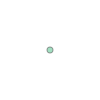

In [16]:
p1.to_shapely()